<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Demo The Doppler Effect
## TFY4170

### Wave Physics 

<section class="post-meta">
By Pawel Sikorski, Department of Physics, NTNU
</section>
Last edited: January 18th 2022


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation


# Enable interactive plot
%matplotlib inline

from IPython.display import HTML
FPS=30
plt.style.use('default')

ModuleNotFoundError: No module named 'ipympl'

In [ ]:
# Time-dependent surce amplitude
def A(t0):
     Amplitude=np.ones(t0.shape) 
     return Amplitude


In [ ]:
def y(x,t0,phi,omega1,k1,v):
  # calculated form given angular frequency and wave propagation velocity

  y = A(t0-x/v)*np.sin(omega1*t0 - (k1*x) + phi) 
  return y  

The code below works well only for $v_s>0$ and/or positive propagation direction.  I can not figure out what is wrong for $vs<0$.

<IPython.core.display.Javascript object>


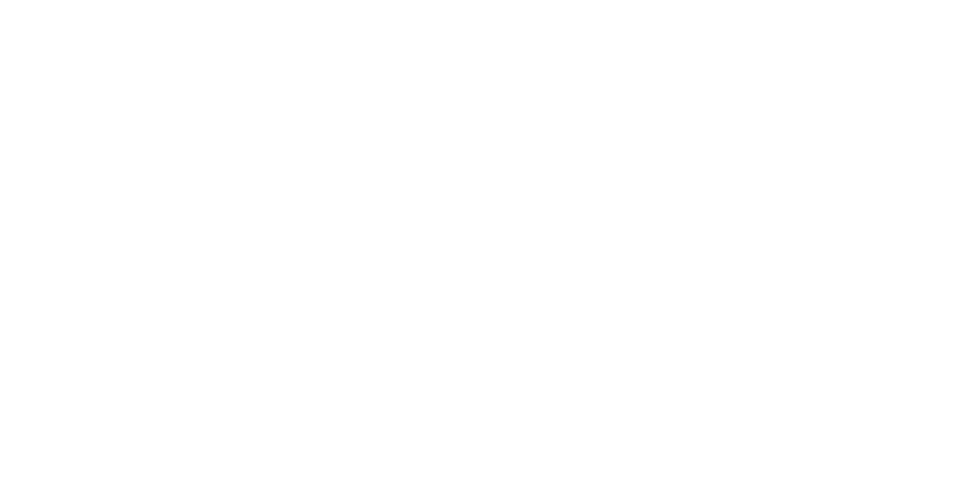

In [ ]:
global Y

#system parameters
omega1=2*np.pi  
omega2=1.5*np.pi  
v = 3 #m/s
vS = 1.5
Interval=10 #Delay between frames in milliseconds 


T1 = 2*np.pi/omega1 
Lambda1 = v*T1 #[m]
k1 = 2*np.pi/Lambda1

MINX = -40
MAXX = 40 # [m]

#Delta x should be equal to v*Delta-t

x = np.linspace(MINX, MAXX, 2001)
xS=np.linspace(MINX, MAXX, 2001)
xN=np.linspace(MINX, MAXX, 2001)
dx=x[1]-x[0]

Interval=1000*dx/v
#dx=v*Interval/1000



Y = np.zeros(x.shape) #*(1*t0/10)
YS = np.zeros(x.shape) #*(1*t0/10)
YN = np.zeros(x.shape) #*(1*t0/10)






# Set up the figure
fig = plt.figure(figsize=(16, 8), dpi=60)
ax = plt.axes(xlim=(MINX-0.5, MAXX), ylim=(-4, 4))
#ax.set_aspect('equal')

line, = ax.plot([], linewidth=4)
ball = plt.Circle((0, 0), .4, fc="grey")
ax.add_patch(ball)

#line1, = ax.plot([], linewidth=4)
#ball1 = plt.Circle((0, 0), .4, fc="grey")
#ax.add_patch(ball1)

line2, = ax.plot([], linewidth=4)
ball2 = plt.Circle((0, 0), .4, fc="grey")
ax.add_patch(ball2)





time_text = ax.text(0.2, .8, '', transform=ax.transAxes)
v_text = ax.text(0.6, .8, '', transform=ax.transAxes)



def animate(frame_num):
    global Y,x,YS, xS, xN,YN,dx
    t=frame_num*Interval/1000 #time in [s]
    time_text.set_text('time = %.2f s' % t)
    
       #For some reason this does not work for neg velocity. 
    #x = x-vS*Interval/1000   #Shifs the xaxis so x=0 at the source position
    xSource = vS*t
    
    Source=np.abs(x - xSource).argmin()
    v_text.set_text('Xs = %.2f' % x[Source])
    Y=np.roll(Y, 1)
    Y[Source] = y(0,t,0,omega1,k1,v)
    Y0 =y(0,t,0,omega1,k1,v) 

    
    YS=np.roll(YS, 1)  
    YS[np.argmin(np.abs(xS))] = y(0,t,0,omega1,k1,v) 
    Y0S =y(0,t,0,omega1,k1,v) 
 
    YN=np.roll(YN, -1)  
    YN[Source] = y(0,t,0,omega1,k1,v)
    Y0N =y(0,t,0,omega1,k1,v) 
 
    
    ball.center = (x[Source], Y0)
    line.set_data((xS, Y))

   # ball1.center = (0, Y0S)
   # line1.set_data((xS, YS))
  #    ball2.center = (0, Y0N)
    line2.set_data((xN, YN))

    
    return line


anim = FuncAnimation(fig, animate, frames=1000, interval=Interval) 
#plt.show() # this shows the animation as it is generated. 

# Display the animation as video
plt.close(anim._fig)
HTML(anim.to_html5_video()) # this takes few seconds 